<a href="https://colab.research.google.com/github/NINJAHATTORI004/programmingwithdataanalysis/blob/main/Project_Image_Captioning_with_googlelens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# So we are using Inception V3 as it is a Feature Extractor which will be used for image feature extractor
# from Images so use some layers of this model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow.keras.preprocessing.image as tf_image  # For Preprocessing the images
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
encode_model = InceptionV3(weights='imagenet')  # Weights if Imagenet
encode_model = Model(encode_model.input, encode_model.layers[-2].output)  # Taking Encode Model
# We are only taking feature extraction properties of this model as last 2 are classification properties

WIDTH = 299   # Setting standard of Images
HEIGHT = 299
OUTPUT_DIM = 2048

START = "startseq"  # Knowing Where the Sentence seq is starting and ending while passing through LSTM
STOP = "endseq"
EPOCHS = 10

preprocess_input = inception.preprocess_input  # taking Pre_In from Inception to preprocess image Dataset


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Passing Image to Feature Vector
def encodeImage(img):  # Passing image to an Array
    img = img.resize((WIDTH, HEIGHT))  # (299, 299) converted to size
    x = tf_image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # expand the image dim like (x, 299, 299)
    x = preprocess_input(x)
    x = encode_model.predict(x)  # Get the encoding vector for the image
    x = np.reshape(x, OUTPUT_DIM)  # flattened way to reshape, we get (x, 2048)
    # this is how image data is changing internally
    return x


In [10]:
# So we are using Inception V3 as it is a Feature Extractor which will be used for image feature extractor
# from Images so use some layers of this model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow.keras.preprocessing.image as tf_image  # For Preprocessing the images
import pandas as pd
import numpy as np

# ... (rest of the code) ...

# Testing on sample Image
img = tf_image.load_img('/content/drive/MyDrive/Project/images/1.jpg', target_size=(299, 299)) # Using the correct module name 'tf_image'
encodeImage(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.36294484, 0.21345316, 0.80201435, ..., 0.3665316 , 0.22385047,
       0.50166726], dtype=float32)

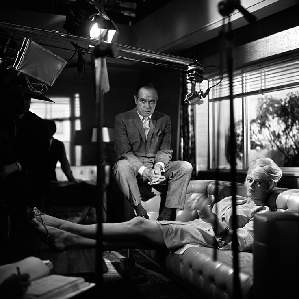

In [12]:
img

In [13]:
data=pd.read_csv('/content/drive/MyDrive/Project/image_caption_map.csv')

In [14]:
data.head(2)

,caption,url,file_name
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg


In [17]:
data['caption']=data['caption'].apply(lambda x: START+' '+x+' '+STOP)

In [18]:
remove_these = []  # in this list we will add names of files that are not encoded properly
encoded_images = {}  # This dictionary will hold encoded images and names

for i in range(data.shape[0]):  # iterate on images
    image_path = '/content/drive/MyDrive/Colab Notebooks/Project/images/' + data['file_name'][i]
    print(image_path)
    try:
        img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
        encoded_images[int(data['file_name'][i].split('.')[0])] = encodeImage(img)
    except:
        print('remove: ', i)
        remove_these.append(data['file_name'][i])

# some of the images are not in supported format
# we'll exclude those


/content/drive/MyDrive/Colab Notebooks/Project/images/1.jpg
remove:  0
/content/drive/MyDrive/Colab Notebooks/Project/images/3.jpg
remove:  1
/content/drive/MyDrive/Colab Notebooks/Project/images/4.jpg
remove:  2
/content/drive/MyDrive/Colab Notebooks/Project/images/5.jpg
remove:  3
/content/drive/MyDrive/Colab Notebooks/Project/images/6.jpg
remove:  4
/content/drive/MyDrive/Colab Notebooks/Project/images/7.jpg
remove:  5
/content/drive/MyDrive/Colab Notebooks/Project/images/8.jpg
remove:  6
/content/drive/MyDrive/Colab Notebooks/Project/images/9.jpg
remove:  7
/content/drive/MyDrive/Colab Notebooks/Project/images/11.jpg
remove:  8
/content/drive/MyDrive/Colab Notebooks/Project/images/12.jpg
remove:  9
/content/drive/MyDrive/Colab Notebooks/Project/images/13.jpg
remove:  10
/content/drive/MyDrive/Colab Notebooks/Project/images/14.jpg
remove:  11
/content/drive/MyDrive/Colab Notebooks/Project/images/15.jpg
remove:  12
/content/drive/MyDrive/Colab Notebooks/Project/images/16.jpg
remove: 